In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
master_df = pd.read_csv(r'C:\Users\Shoya\Senseai\data\Traffic_Data.csv', encoding="ISO-8859-1")
                    
master_df['Date'] = pd.to_datetime(master_df['Date'])
master_df['Day of Week'] = master_df['Date'].dt.weekday_name
    
display(master_df.head())
display(master_df.columns)

,Date,Unique visitors,Visits,Users,Actions,Maximum actions in one visit,Bounces,Total time spent by visitors (in seconds),Conversions,Visits with Conversions,...,Unique returning visitors,Returning Users,Maximum actions in one returning visit,nb_conversions_returning_visit,nb_visits_converted_returning_visit,revenue_returning_visit,conversion_rate_returning_visit,nb_hits_with_time_generation,Avg. generation time,Day of Week
0,2018-04-04,43,51,25,2551,262,6,146979,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday
1,2018-04-05,275,435,275,21699,1791,58,1682757,0,0,...,15.0,15.0,1791.0,0.0,0.0,0.0,0%,NaN,NaN,Thursday
2,2018-04-06,317,433,317,25238,2356,51,1564032,0,0,...,14.0,14.0,2356.0,0.0,0.0,0.0,0%,NaN,NaN,Friday
3,2018-04-07,35,53,35,18651,2283,5,1179181,0,0,...,12.0,12.0,2283.0,0.0,0.0,0.0,0%,NaN,NaN,Saturday
4,2018-04-08,31,54,31,15204,2176,5,1108012,0,0,...,12.0,12.0,2176.0,0.0,0.0,0.0,0%,NaN,NaN,Sunday


Index(['Date', 'Unique visitors', 'Visits', 'Users', 'Actions',
       'Maximum actions in one visit', 'Bounces',
       'Total time spent by visitors (in seconds)', 'Conversions',
       'Visits with Conversions', 'Revenue', 'Conversion Rate',
       'nb_conversions_new_visit', 'nb_visits_converted_new_visit',
       'revenue_new_visit', 'conversion_rate_new_visit', 'Pageviews',
       'Unique Pageviews', 'Downloads', 'Unique Downloads', 'Outlinks',
       'Unique Outlinks', 'Searches', 'Unique Keywords', 'Bounce Rate',
       'Actions per Visit', 'Avg. Visit Duration (in seconds)',
       'Avg. Duration of a Returning Visit (in sec)',
       'Avg. Actions per Returning Visit', 'Bounce Rate for Returning Visits',
       'Returning Visits', 'Actions by Returning Visits',
       'Unique returning visitors', 'Returning Users',
       'Maximum actions in one returning visit',
       'nb_conversions_returning_visit', 'nb_visits_converted_returning_visit',
       'revenue_returning_visit', 

In [3]:
def convert_to_seconds(val):
    words = val.split()
    if (len(words) == 1 ):
        # format: only seconds 
        return int(val[:-1])
    elif ('hours' in words):
        # format: hours, min 
        return (int(words[0]) * 3600) + ( int(words[2]) * 60 )
    else:
        # format: min, seconds
        try:
            return ( int(words[0]) * 60 ) + ( int(words[-1][:-1]) )
        except:
            return None 
    
master_df['Avg. Visit Duration'] = master_df['Avg. Visit Duration (in seconds)'].apply(convert_to_seconds)

display(master_df['Avg. Visit Duration'].head(2))

0    2882
1    3840
Name: Avg. Visit Duration, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# One hot encode Day of Week 

days_of_week_values = master_df['Day of Week'].values

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(days_of_week_values)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

display(days_of_week_values[:8])
display(onehot_encoded[:8])

days_of_week_df = pd.DataFrame(onehot_encoded, columns=['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7'])

master_df = master_df.join(days_of_week_df, how='outer')
display(master_df.head(3))

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday'], dtype=object)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.]])

,Date,Unique visitors,Visits,Users,Actions,Maximum actions in one visit,Bounces,Total time spent by visitors (in seconds),Conversions,Visits with Conversions,...,Avg. generation time,Day of Week,Avg. Visit Duration,d1,d2,d3,d4,d5,d6,d7
0,2018-04-04,43,51,25,2551,262,6,146979,0,0,...,NaN,Wednesday,2882,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2018-04-05,275,435,275,21699,1791,58,1682757,0,0,...,NaN,Thursday,3840,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2018-04-06,317,433,317,25238,2356,51,1564032,0,0,...,NaN,Friday,3600,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
master_df['Unique visitors (t-1)'] = master_df['Unique visitors'].shift(1)
master_df.head(4)

,Date,Unique visitors,Visits,Users,Actions,Maximum actions in one visit,Bounces,Total time spent by visitors (in seconds),Conversions,Visits with Conversions,...,Day of Week,Avg. Visit Duration,d1,d2,d3,d4,d5,d6,d7,Unique visitors (t-1)
0,2018-04-04,43,51,25,2551,262,6,146979,0,0,...,Wednesday,2882,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
1,2018-04-05,275,435,275,21699,1791,58,1682757,0,0,...,Thursday,3840,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43.0
2,2018-04-06,317,433,317,25238,2356,51,1564032,0,0,...,Friday,3600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0
3,2018-04-07,35,53,35,18651,2283,5,1179181,0,0,...,Saturday,22200,0.0,0.0,1.0,0.0,0.0,0.0,0.0,317.0


,Unique visitors,Visits,Users,Bounces,Total time spent by visitors (in seconds),Avg. Visit Duration,d1,d2,d3,d4,d5,d6,d7,Unique visitors (t-1)
0,43,51,25,6,146979,2882,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
1,275,435,275,58,1682757,3840,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43.0
2,317,433,317,51,1564032,3600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0
3,35,53,35,5,1179181,22200,0.0,0.0,1.0,0.0,0.0,0.0,0.0,317.0
4,31,54,31,5,1108012,20460,0.0,0.0,0.0,1.0,0.0,0.0,0.0,35.0


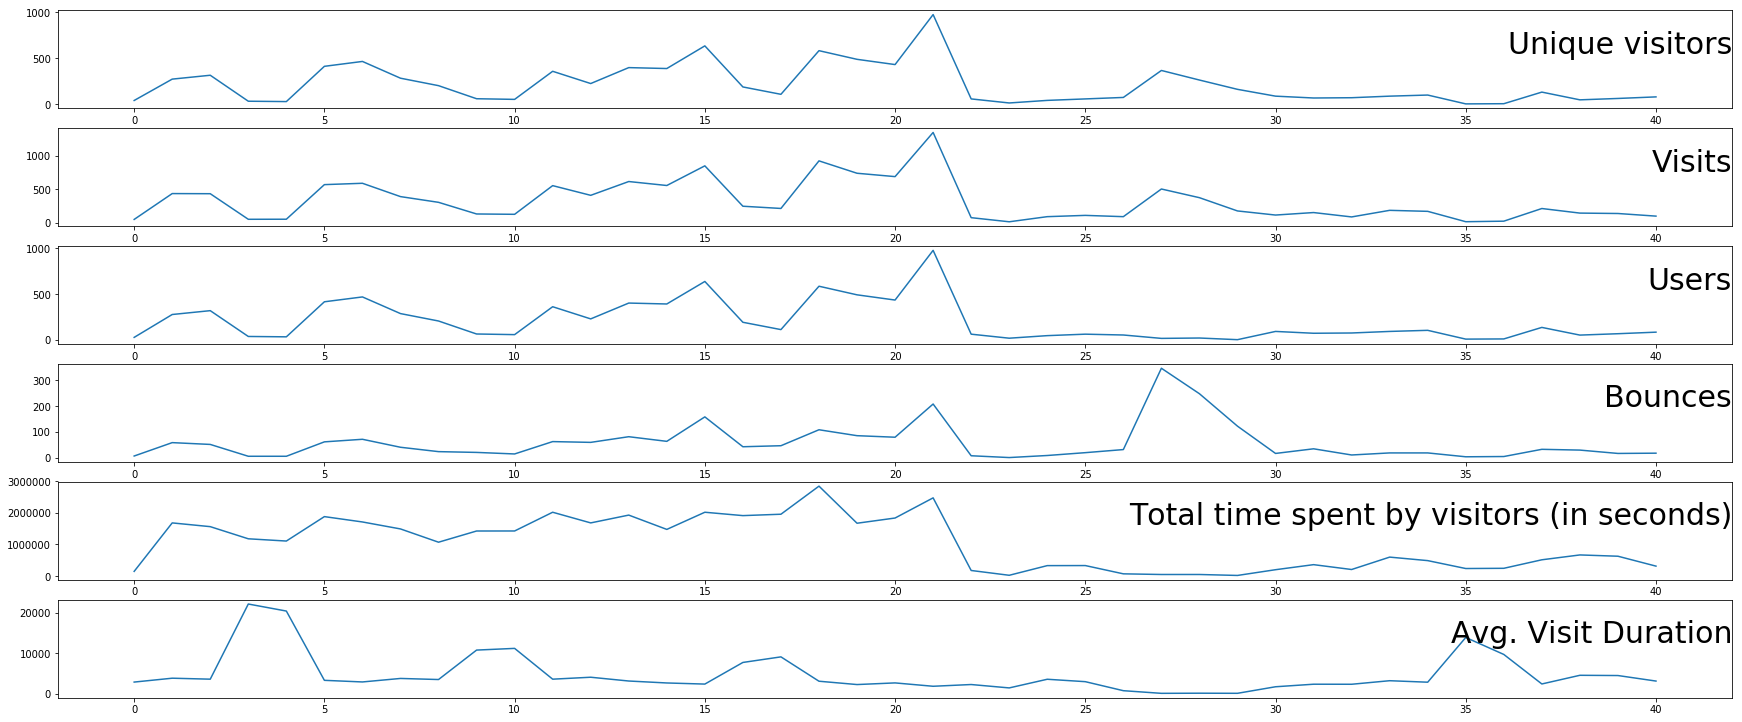

In [6]:
fig = plt.figure(figsize=(30,30))

columns = ['Unique visitors', 'Visits', 'Users', 'Bounces', 'Total time spent by visitors (in seconds)','Avg. Visit Duration', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'Unique visitors (t-1)']

df = master_df[columns]
display(df.head())

i = 1 
for column in columns[:6]:
    ax = plt.subplot(len(columns), 1, i)
    plt.plot(df[column])
    plt.title(str(column), y=0.5, loc='right', fontsize=30)
    i += 1 
plt.show()

In [7]:
from tpot import TPOTRegressor
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=3)

X = df[['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'Unique visitors (t-1)']].values
Y = df['Unique visitors'].values

train_size = int(len(X) * 0.8)
X_train, X_test = X[1:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[1:train_size], Y[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(X_train)))
print('Testing Observations: %d' % (len(Y_test)))

Observations: 41
Training Observations: 31
Testing Observations: 9


In [11]:
tpot = TPOTRegressor(max_time_mins=90, cv=tscv, verbosity=2)
tpot.fit(X_train, Y_train)

Generation 1 - Current best internal CV score: -47417.75088760792


Generation 2 - Current best internal CV score: -47417.75088760792


Generation 3 - Current best internal CV score: -44666.61003315902


Generation 4 - Current best internal CV score: -44666.61003315902


Generation 5 - Current best internal CV score: -44666.61003315902


Generation 6 - Current best internal CV score: -44666.61003315902


Generation 7 - Current best internal CV score: -43714.72929214898


Generation 8 - Current best internal CV score: -42398.93737203811


Generation 9 - Current best internal CV score: -42061.599345536095


Generation 10 - Current best internal CV score: -42061.599345536095


Generation 11 - Current best internal CV score: -42061.599345536095


Generation 12 - Current best internal CV score: -41886.830321874564


Generation 13 - Current best internal CV score: -41186.3763042413


Generation 14 - Current best internal CV score: -40390.19025019506


Generation 15 - Current best internal CV score: -37855.75950675588


Generation 16 - Current best internal CV score: -37855.75950675588


Generation 17 - Current best internal CV score: -37855.75950675588


Generation 18 - Current best internal CV score: -37855.75950675588


Generation 19 - Current best internal CV score: -37855.75950675588


Generation 20 - Current best internal CV score: -37855.75950675588


Generation 21 - Current best internal CV score: -37855.75950675588


Generation 22 - Current best internal CV score: -36627.52678787388


Generation 23 - Current best internal CV score: -36627.52678787388


Generation 24 - Current best internal CV score: -35537.5081866834


Generation 25 - Current best internal CV score: -35537.5081866834


Generation 26 - Current best internal CV score: -34899.3371329365


Generation 27 - Current best internal CV score: -34899.3371329365


Generation 28 - Current best internal CV score: -34899.3371329365


Generation 29 - Current best internal CV score: -34899.3371329365


Generation 30 - Current best internal CV score: -34899.3371329365


Generation 31 - Current best internal CV score: -34899.3371329365


Generation 32 - Current best internal CV score: -34899.3371329365


Generation 33 - Current best internal CV score: -33551.09900793651


Generation 34 - Current best internal CV score: -33551.09900793651


Generation 35 - Current best internal CV score: -33551.09900793651


Generation 36 - Current best internal CV score: -33551.09900793651


Generation 37 - Current best internal CV score: -33551.09900793651


Generation 38 - Current best internal CV score: -33108.674166666664


Generation 39 - Current best internal CV score: -33108.674166666664


Generation 40 - Current best internal CV score: -33108.674166666664


Generation 41 - Current best internal CV score: -33108.674166666664


Generation 42 - Current best internal CV score: -33108.674166666664


Generation 43 - Current best internal CV score: -33108.674166666664


Generation 44 - Current best internal CV score: -33108.674166666664


Generation 45 - Current best internal CV score: -33108.674166666664


Generation 46 - Current best internal CV score: -33108.674166666664


Generation 47 - Current best internal CV score: -33108.674166666664


Generation 48 - Current best internal CV score: -33108.674166666664


Generation 49 - Current best internal CV score: -33108.674166666664


Generation 50 - Current best internal CV score: -33108.674166666664


Generation 51 - Current best internal CV score: -33108.674166666664


Generation 52 - Current best internal CV score: -33108.674166666664


Generation 53 - Current best internal CV score: -33108.674166666664


Generation 54 - Current best internal CV score: -33108.674166666664


Generation 55 - Current best internal CV score: -33108.674166666664


Generation 56 - Current best internal CV score: -33108.674166666664


Generation 57 - Current best internal CV score: -33108.674166666664


Generation 58 - Current best internal CV score: -33108.674166666664


Generation 59 - Current best internal CV score: -33108.674166666664


Generation 60 - Current best internal CV score: -33108.674166666664


Generation 61 - Current best internal CV score: -33108.674166666664


Generation 62 - Current best internal CV score: -33108.674166666664


Generation 63 - Current best internal CV score: -33108.674166666664


Generation 64 - Current best internal CV score: -33108.674166666664


Generation 65 - Current best internal CV score: -33108.674166666664


Generation 66 - Current best internal CV score: -33108.674166666664


Generation 67 - Current best internal CV score: -32746.007499999996


Generation 68 - Current best internal CV score: -32746.007499999996


Generation 69 - Current best internal CV score: -32746.007499999996


Generation 70 - Current best internal CV score: -32746.007499999996


Generation 71 - Current best internal CV score: -32746.007499999996


Generation 72 - Current best internal CV score: -32746.007499999996


Generation 73 - Current best internal CV score: -32746.007499999996


Generation 74 - Current best internal CV score: -32746.007499999996


Generation 75 - Current best internal CV score: -32746.007499999996


Generation 76 - Current best internal CV score: -32746.007499999996


Generation 77 - Current best internal CV score: -32746.007499999996


Generation 78 - Current best internal CV score: -32746.007499999996


Generation 79 - Current best internal CV score: -32746.007499999996


Generation 80 - Current best internal CV score: -32746.007499999996


Generation 81 - Current best internal CV score: -32746.007499999996


Generation 82 - Current best internal CV score: -32746.007499999996


Generation 83 - Current best internal CV score: -32746.007499999996


Generation 84 - Current best internal CV score: -32746.007499999996


Generation 85 - Current best internal CV score: -32746.007499999996


Generation 86 - Current best internal CV score: -32746.007499999996


Generation 87 - Current best internal CV score: -32746.007499999996


Generation 88 - Current best internal CV score: -32746.007499999996


Generation 89 - Current best internal CV score: -32746.007499999996


Generation 90 - Current best internal CV score: -32746.007499999996


Generation 91 - Current best internal CV score: -32746.007499999996


Generation 92 - Current best internal CV score: -32746.007499999996


Generation 93 - Current best internal CV score: -32746.007499999996


Generation 94 - Current best internal CV score: -32746.007499999996


Generation 95 - Current best internal CV score: -32746.007499999996


Generation 96 - Current best internal CV score: -32746.007499999996


Generation 97 - Current best internal CV score: -32746.007499999996


Generation 98 - Current best internal CV score: -32746.007499999996


Generation 99 - Current best internal CV score: -32746.007499999996


Generation 100 - Current best internal CV score: -32746.007499999996


Generation 101 - Current best internal CV score: -32746.007499999996


Generation 102 - Current best internal CV score: -32746.007499999996


Generation 103 - Current best internal CV score: -32746.007499999996


Generation 104 - Current best internal CV score: -32746.007499999996


Generation 105 - Current best internal CV score: -32746.007499999996


Generation 106 - Current best internal CV score: -32746.007499999996


Generation 107 - Current best internal CV score: -32746.007499999996


Generation 108 - Current best internal CV score: -32746.007499999996


Generation 109 - Current best internal CV score: -32746.007499999996


Generation 110 - Current best internal CV score: -32746.007499999996


Generation 111 - Current best internal CV score: -32746.007499999996


Generation 112 - Current best internal CV score: -32746.007499999996


Generation 113 - Current best internal CV score: -32746.007499999996


Generation 114 - Current best internal CV score: -32746.007499999996


Generation 115 - Current best internal CV score: -32746.007499999996


Generation 116 - Current best internal CV score: -32746.007499999996


Generation 117 - Current best internal CV score: -32746.007499999996


Generation 118 - Current best internal CV score: -32746.007499999996


Generation 119 - Current best internal CV score: -32746.007499999996


Generation 120 - Current best internal CV score: -32746.007499999996


Generation 121 - Current best internal CV score: -32746.007499999996


Generation 122 - Current best internal CV score: -32746.007499999996


Generation 123 - Current best internal CV score: -32746.007499999996


Generation 124 - Current best internal CV score: -32746.007499999996


Generation 125 - Current best internal CV score: -32746.007499999996


Generation 126 - Current best internal CV score: -32746.007499999996


Generation 127 - Current best internal CV score: -32746.007499999996


Generation 128 - Current best internal CV score: -32746.007499999996


Generation 129 - Current best internal CV score: -32746.007499999996


Generation 130 - Current best internal CV score: -32746.007499999996


Generation 131 - Current best internal CV score: -32647.56074074074


Generation 132 - Current best internal CV score: -32647.56074074074


Generation 133 - Current best internal CV score: -32647.56074074074


Generation 134 - Current best internal CV score: -32647.56074074074


Generation 135 - Current best internal CV score: -32647.56074074074


Generation 136 - Current best internal CV score: -32647.56074074074


Generation 137 - Current best internal CV score: -32095.930052910047


Generation 138 - Current best internal CV score: -32095.930052910047


Generation 139 - Current best internal CV score: -32095.930052910047


Generation 140 - Current best internal CV score: -32095.930052910047


Generation 141 - Current best internal CV score: -32095.930052910047


Generation 142 - Current best internal CV score: -25732.179911816576


Generation 143 - Current best internal CV score: -25732.179911816576


90.44502315 minutes have elapsed. TPOT will close down.
TPOT closed prematurely. Will use the current best pipeline.



Best pipeline: DecisionTreeRegressor(ElasticNetCV(ExtraTreesRegressor(RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.3, min_samples_leaf=8, min_samples_split=4, n_estimators=100), bootstrap=False, max_features=0.15, min_samples_leaf=5, min_samples_split=9, n_estimators=100), l1_ratio=0.95, tol=0.1), max_depth=4, min_samples_leaf=2, min_samples_split=6)


TPOTRegressor(config_dict={'xgboost.XGBRegressor': {'n_estimators': [100], 'min_child_weight': range(1, 21), 'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0], 'max_depth': range(1, 11), 'subsample': array([ 0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,...e_selection.VarianceThreshold': {'threshold': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]}},
       crossover_rate=0.1,
       cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=90, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=100,
       periodic_checkpoint_folder=None, population_size=100,
       random_state=None, scoring=None, subsample=1.0, verbosity=2,
       warm_start=False)

In [12]:
tpot.score(X_test, Y_test)

-14362.049251700681

In [ ]:
tpot.export('tpot_predict_traffic_pipeline.py')